# White Wine prediction - Machine Learning Project

by: Farzam Salimi, Rojan Aslani

wine quality Dataset

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Objective: 
Classification: Try to predict for future samples what the class is for each sample

Classification models: kNN, Naive Bayes, Log Regression, SVM

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [253]:
cols = ["fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "density", "pH","sulphate", "alcohol", "class"] # Quality is class

df = pd.read_csv("winequality-white.csv", names = cols, delimiter=";", header=0)

# We know that the class is g so this is supervised learning - for each input we have a corresponding output
df.head()

,fix_acidity,vol_acidity,critic_acidity,res_sugar,chloride,free_SO2,tot_SO2,density,pH,sulphate,alcohol,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Data Exploration

Datafram has no missing data.

all variables are float, except for quality (class) which is int.


In [254]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fix_acidity     4898 non-null   float64
 1   vol_acidity     4898 non-null   float64
 2   critic_acidity  4898 non-null   float64
 3   res_sugar       4898 non-null   float64
 4   chloride        4898 non-null   float64
 5   free_SO2        4898 non-null   float64
 6   tot_SO2         4898 non-null   float64
 7   density         4898 non-null   float64
 8   pH              4898 non-null   float64
 9   sulphate        4898 non-null   float64
 10  alcohol         4898 non-null   float64
 11  class           4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


(4898, 12)

In [255]:
df["class"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: class, dtype: int64

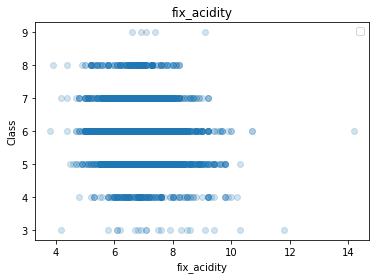

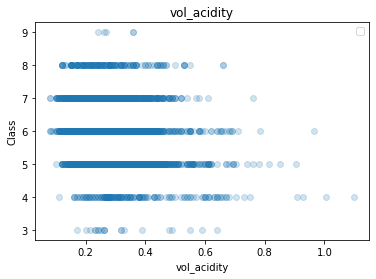

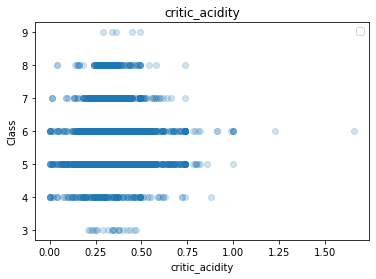

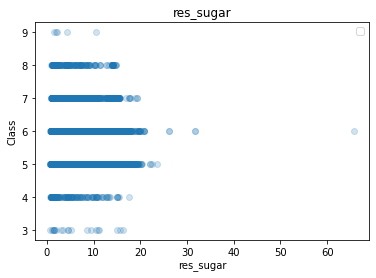

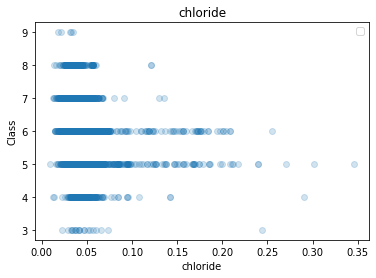

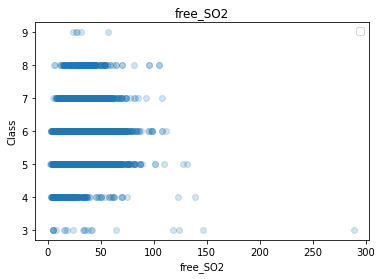

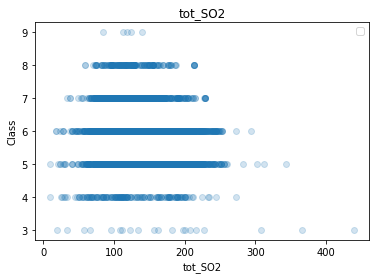

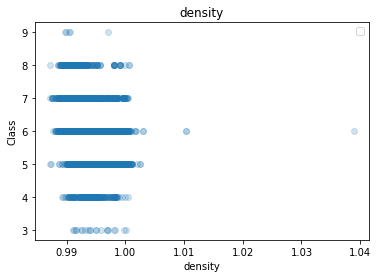

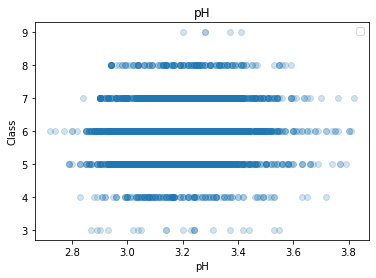

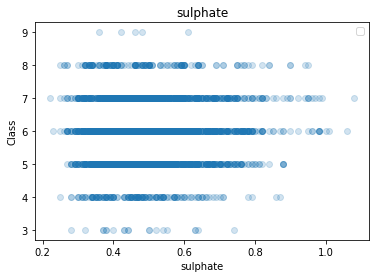

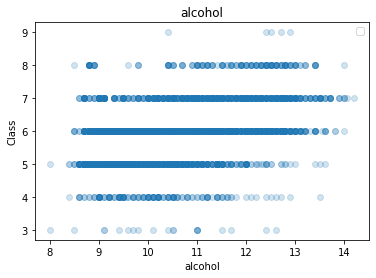

In [256]:
for label in cols[:-1]: # -1 : for all columns except for the last one (class)
  # Density = True with normalize them so its easier and more correct for comparison of the two
  plt.scatter(df[label], df["class"], alpha = 0.2)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Class")
  plt.legend()
  plt.show()

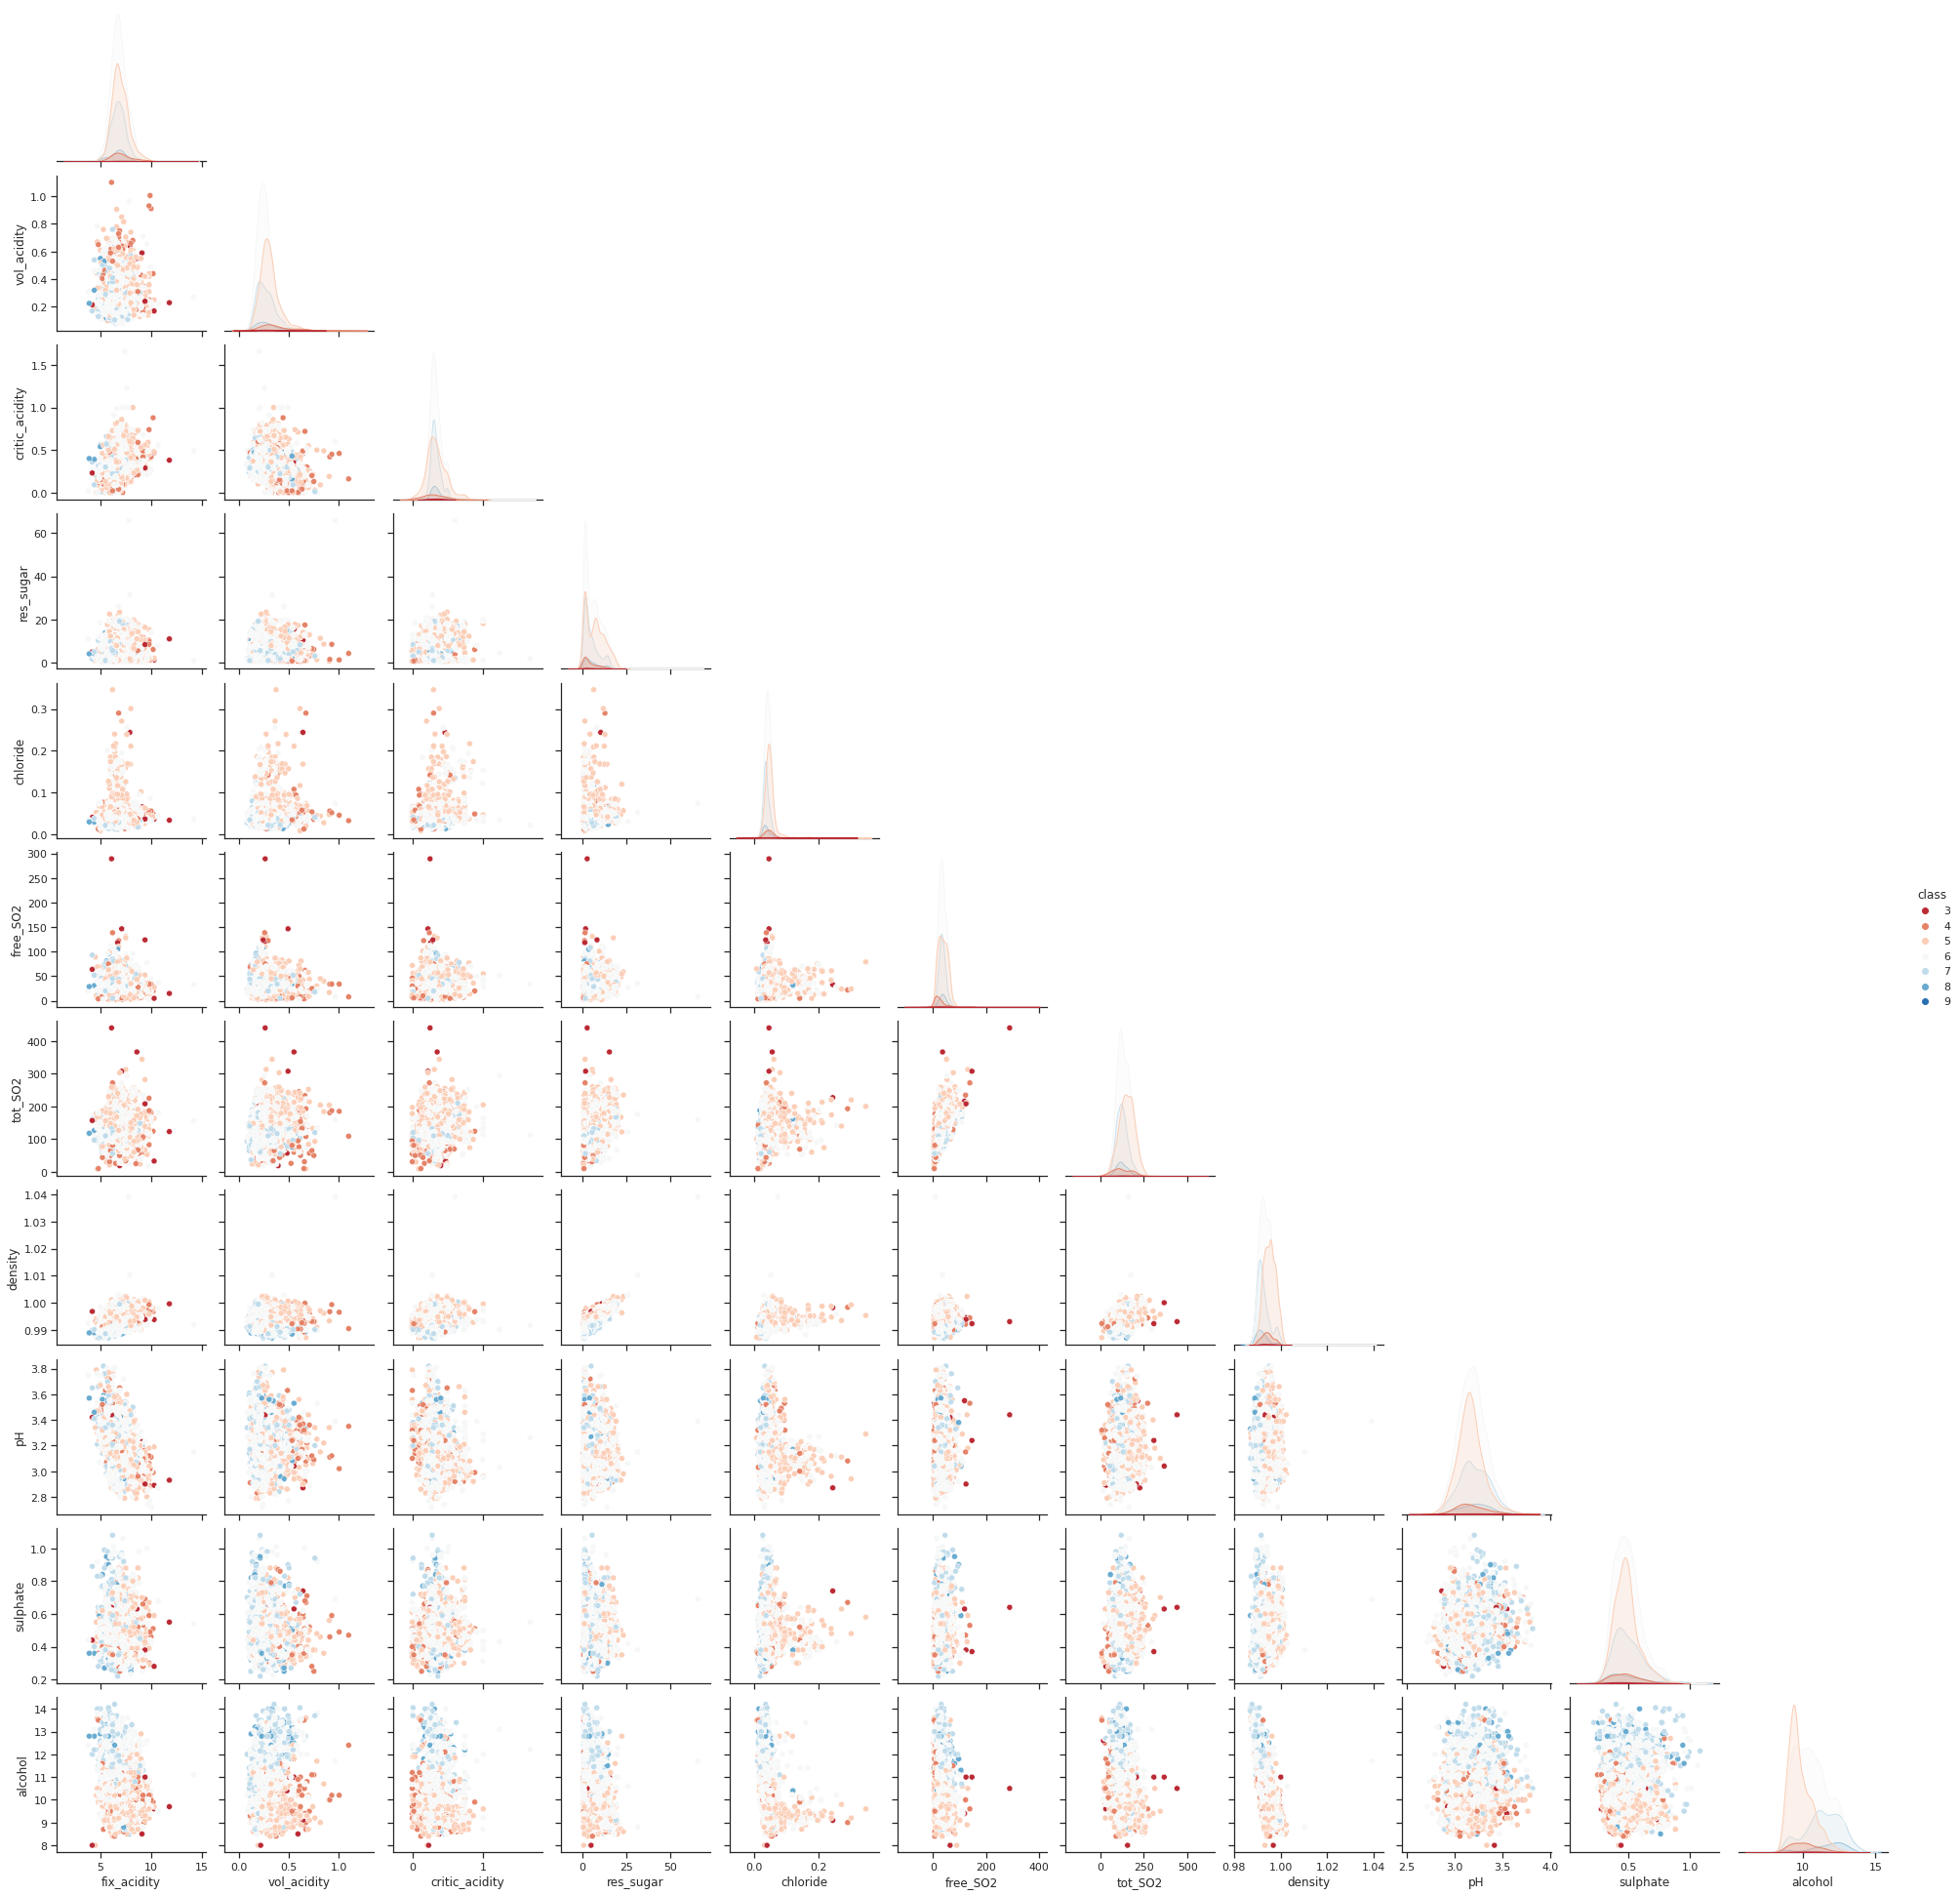

In [260]:
sns.set_theme(style="ticks")
diverging_colors = sns.color_palette("RdBu", 7)
sns.pairplot(df, hue="class", corner=True, palette = diverging_colors)

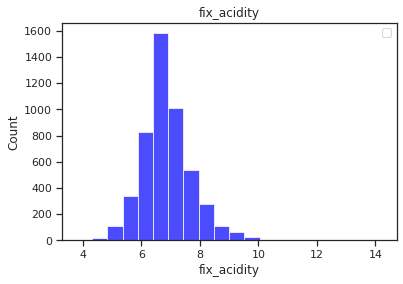

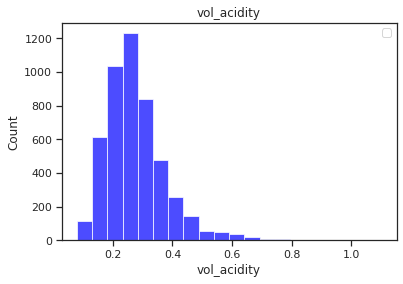

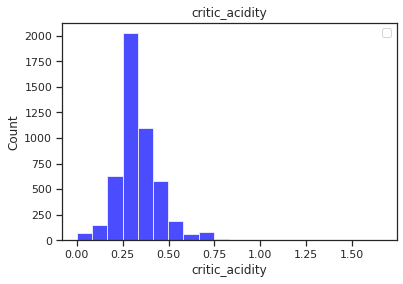

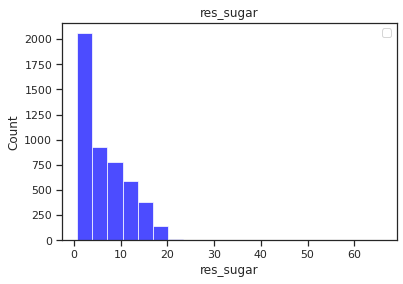

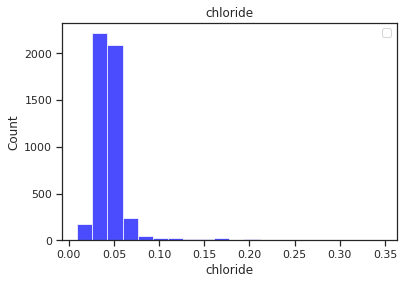

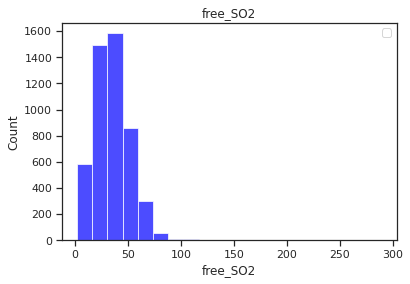

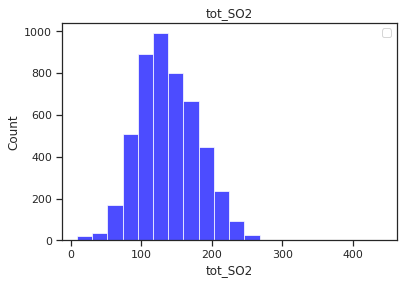

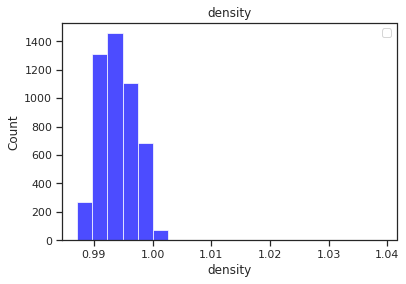

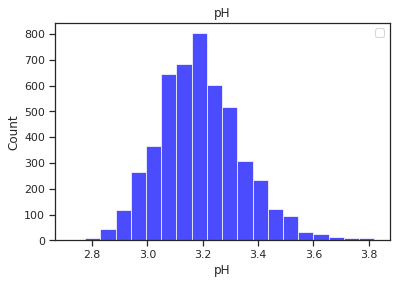

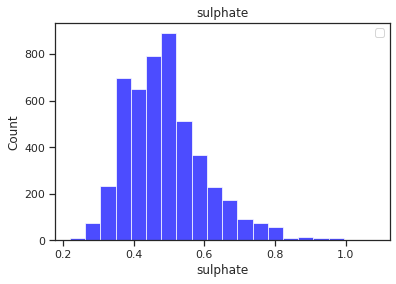

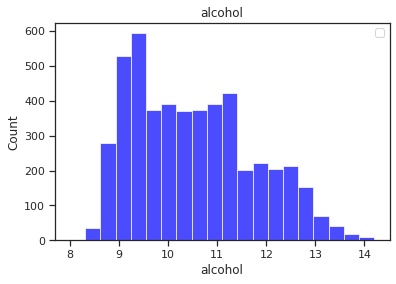

In [261]:
for label in cols[:-1]: # -1 : for all columns except for the last one (class)
  # Density = True with normalize them so its easier and more correct for comparison of the two
  plt.hist(df[label], color = 'blue', alpha = 0.7,  bins = 20) # all the different values that belong to class g for this specific label
  #plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True) # all the different values that belong to class h for this specific label
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Count")
  plt.legend()
  plt.show()

We need to scale (normalize) the data for each column because of the high variability between the columns. To do so, we used standardization method - StandardScaler() function in python. Moreover, oversampling was done for the under sampled attributes. - scaling can and will induce over-fitting.

In [262]:
# Scale (normalize) the results for each column according to its mean and stdev bcuz the variability between different columns is alot
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values # Y axis is the class

  # Take X and fit the transformer to X and transform all those values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Oversample - will match the size of the samples
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  # hstack: horizontally stack - side by side
  data = np.hstack((X, np.reshape(y, (-1,1)))) #X is 2D but y is 1D so we will reshape it to a 2D item - -1,1: -1 means infer what the length of y should be
  return data, X, y


**QUESTION?? WHAT ABOUT CLASSES THAT HAVE NO ATTRIBUTES?? **

Three different datasets were defined: training, validation, and testing.

*   Training: 60%
*   validation: 20%
*   Testing: 20%



In [263]:
#df.loc[df['class'] <= 5, 'class'] = 0
#df.loc[df['class'] > 5, 'class'] = 1

df["class"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: class, dtype: int64

In [264]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [266]:
train, X_train, y_train = scale_dataset(train, oversample = True)
#df["class"].value_counts()

In [267]:
 # we dont want to oversample these because we want them to be true testing/validation real life datasets
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [272]:
df_train = pd.DataFrame(train,columns=cols)
len(df_train["class"].value_counts())

7

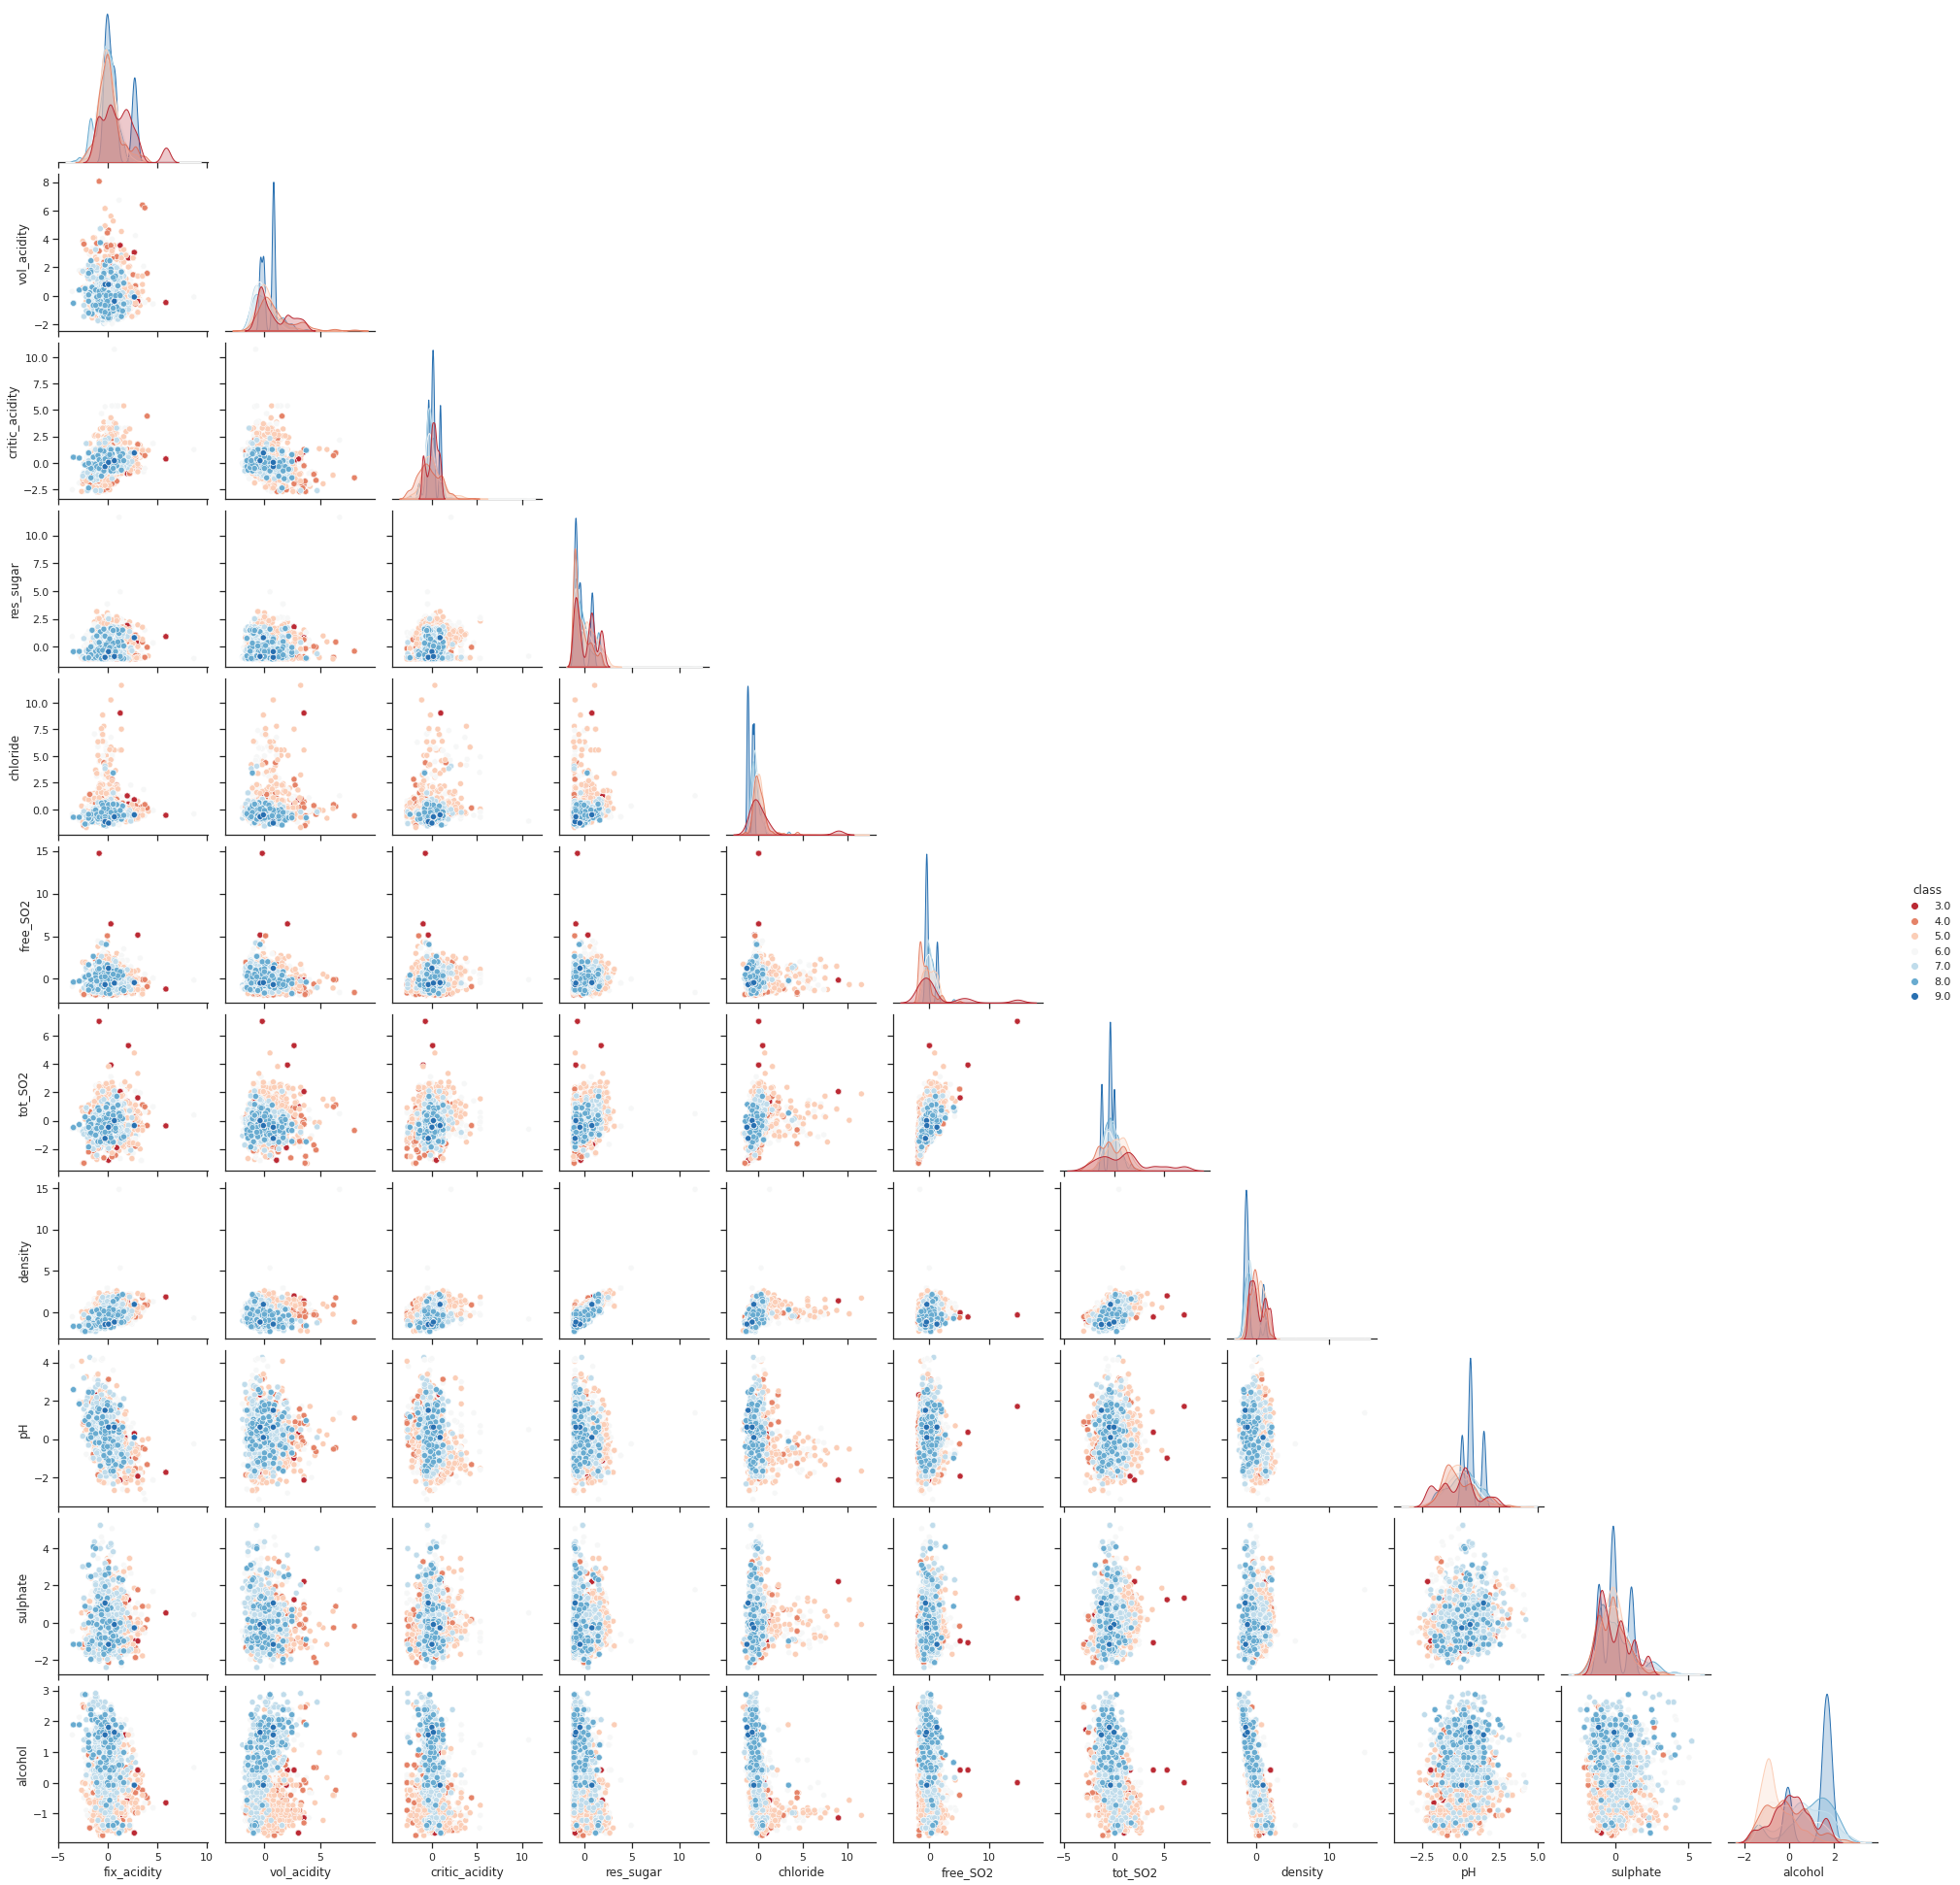

In [271]:
sns.set_theme(style="ticks")
diverging_colors = sns.color_palette("RdBu", 7)
sns.pairplot(df_train, hue="class", corner=True, palette = diverging_colors)

In [ ]:
for label in cols[:-1]: # -1 : for all columns except for the last one (class)
  # Density = True with normalize them so its easier and more correct for comparison of the two
  plt.scatter(df_train[label], df_train["class"], alpha = 0.2)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Class")
  plt.legend()
  plt.show()

In [ ]:
for label in cols[:-1]: # -1 : for all columns except for the last one (class)
  # Density = True with normalize them so its easier and more correct for comparison of the two
  plt.hist(df_train[label], color = 'blue', alpha = 0.7,  bins = 20) # all the different values that belong to class g for this specific label
  #plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True) # all the different values that belong to class h for this specific label
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Count")
  plt.legend()
  plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

#scatter_matrix(df_train)
#plt.show()

#Binary or Multiclass classification

The classification will be done by binary or multiclass according to the input data.

In [ ]:
for label in cols[:-1]: # -1 : for all columns except for the last one (class)
  # Density = True with normalize them so its easier and more correct for comparison of the two
  plt.scatter(df_train[label], df_train["class"], alpha = 0.2)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Class")
  plt.legend()
  plt.show()

Clearly we cannot use linear regression for this dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter = 10000, verbose = 0)
model.fit(X_train, y_train)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)
# Binary: 0.72
# Multiclass: 0.32

In [ ]:
#Where is the model failing? - confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')